In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# LOSOWE INFO O JAWORZU

In [2]:
N = 7026 ##liczba osób w Jaworzu
# kod: 24;02;06;2
t = 10000

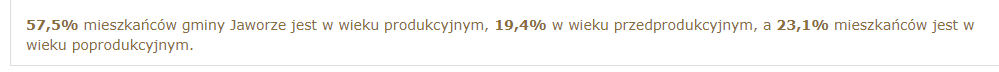

wiek produkcyjny: wiek zdolności do pracy, tj. dla mężczyzn grupa wieku 18-64 lata, dla kobiet - 18-59 lat <br>
czyli takie 18-60

# WCZYTANIE PLIKÓW CSV

In [3]:
##nazwiska męskie i kobiece
nm = pd.read_csv("NM.csv")
nm = nm[nm["Liczba"] > t] ## imiona za tym t=1000 są z dupy - takie pojedyncze crazy ahmiry szmiry
nk = pd.read_csv("NK.csv")
nk = nk[nk["Liczba"] > t]
nk = nk["Nazwisko aktualne"]
nm = nm["Nazwisko aktualne"]

In [4]:
##imiona męskie i kobiece
im = pd.read_csv("IM.csv")
im = im[im["LICZBA WYSTĄPIEŃ"] > t] 
ik = pd.read_csv("IK.csv")
ik = ik[ik["LICZBA_WYSTĄPIEŃ"] > t]
ik = ik["IMIĘ_PIERWSZE"]
im = im["IMIĘ PIERWSZE"]

In [5]:
##ulice z jaworza
ulice = pd.read_csv("ULIC.csv", sep=";")
ulice_jaworze = ulice.query('WOJ == 24 & POW == 2 & GMI == 6 & RODZ_GMI == 2')
ulice_jaworze = np.array(ulice_jaworze["NAZWA_1"])

# LUDNOŚĆ

In [65]:
def ludzie(mi, ki, mn, kn, ul, pk= 0.516, N=7349 ):
    imie = []
    nazwisko = []
    wiek = []
    adres = []
    tel = []
    
    for n in range(N):
        
        p = random.random()
        
        if p < pk: ##losujemy kobietę
            imie.append(random.choice(ki))
            nazwisko.append(random.choice(kn))
        
        else: #losujemy mężczyznę
            imie.append(random.choice(mi))
            nazwisko.append(random.choice(mn))
        
        p = random.random()
        
        if p < 0.575: ##dane statystyczne - 57.5% osób jest w wieku produkcyjnym
            wiek.append(random.randint(18,60))
        elif p < 0.77:
            wiek.append(random.randint(8, 18)) ##19.4% w przedprodukcyjnym
        else:
            wiek.append(random.randint(60,99)) ##reszta starsza
            
        if p< 0.90:
            adres.append(random.choice(ul) + ' ' + str(random.randint(1,100)))
        else:
            adres.append("NULL")
        
        p = random.random()

        if p< 0.90:
            tel.append(random.randint(500000000, 999999999))
        else:
            tel.append("NULL")
            
    
    return pd.DataFrame({"ID": range(1,N+1), "IMIĘ": imie, "NAZWISKO": nazwisko, "WIEK": wiek, "ADRES": adres, "TELEFON": tel})

In [69]:
ludzie(im, ik, nm, nk, ulice_jaworze) ## numer telefonu

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,LEON,WIECZOREK,12,Zdrowotna 39,981158803
1,2,MACIEJ,SAWICKI,8,Motylkowa 33,837879650
2,3,POLA,SZCZEPANIAK,37,Poprzeczna 38,539017494
3,4,DAWID,KRAJEWSKI,88,Cieszyńska 82,572333057
4,5,KINGA,STĘPIEŃ,26,Pierwiosnków 6,942136699
...,...,...,...,...,...,...
7344,7345,STANISLAV,SAWICKI,34,Nad Rudawką 6,773778344
7345,7346,KALINA,MALINOWSKA,60,NULL,642490310
7346,7347,LIDIA,SOKOŁOWSKA,44,Brzozowa 45,512290000
7347,7348,VLADYSLAV,POLAK,69,NULL,646846232


# WIEK A PRAWDOPODOBIEŃSTWO PRZYJŚCIA

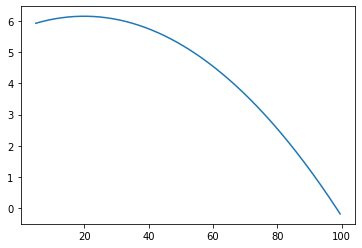

In [10]:
## tworze sobie zależność prawdopodobieństwa, że ktoś nas odwiedzi od wieku mieszkańca
## no bo raczej 90 latkowie rzadko chodzą wypożyczać gry planszowe, a 8 latkowie nie mają pieniędzy
a = 5/6000
c =5-256*a

x = np.arange(5,100, 0.5)
y = (- a*x**2 + 40*a*x + c)*1.2
plt.plot(x,y)

In [11]:
def transform_wiek(wiek): 
    ## funkcja zwracająca częstość z jaką dana  osoba na podst wieku mogłaby nas odwiedzać (czyli jakby pp ze nas odwiedzi)
    
    a = 5/6000 ## wszystkie parametry dobrane na oko
    c =5-256*a
    y = np.ceil((- a*wiek**2 + 40*a*wiek + c)*1.2)
    return y

In [20]:
def transform_wiek(wiek): 
    ## funkcja zwracająca częstość z jaką dana  osoba na podst wieku mogłaby nas odwiedzać (czyli jakby pp ze nas odwiedzi)
    
    if wiek < 10:
        return 1
    elif wiek < 12:
        return 2
    elif wiek < 16:
        return 4
    elif wiek < 25:
        return 8
    elif wiek < 36:
        return 6
    elif wiek < 50:
        return 4
    elif wiek < 70:
        return 2
    else:
        return 1


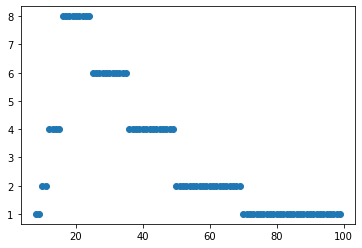

In [21]:
x = np.arange(8,100, 1)
y = [transform_wiek(xx) for xx in x]
plt.scatter(x,y)

In [70]:
## można spróbować jakoś pozmieniać te funkcję, bo jednak dla 9-31 lat mamy najwyższą wartość, a przydałoby się ją 
#jakoś rozłożyć bardziej może, szczególnie patrząc na to, że dzieci (tak do lat 12?) rzadko kupują gry samodzielnie

transform_wiek(9)

1

In [71]:
aa["WIEK"][1]

72

In [72]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze, 0.516, N=75) ##wrzucam to do df bo tak
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]
aa

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP
0,1,MAKSYMILIAN,ZALEWSKI,57,Kryształowa 50,NULL,2
1,2,SYLWESTER,JAROSZ,94,NULL,929693704,1
2,3,EMILIA,LESZCZYŃSKA,30,Bławatkowa 5,913145852,6
3,4,RUSLAN,ANDRZEJEWSKI,76,NULL,697741958,1
4,5,RYSZARD,MIKOŁAJCZYK,18,Narcyzowa 65,734026429,8
...,...,...,...,...,...,...,...
70,71,MAŁGORZATA,CHMIELEWSKA,53,Cisowa 77,835529703,2
71,72,MARIAN,KOZŁOWSKI,8,Wczasowa 52,502069496,1
72,73,NIKOLA,SZEWCZYK,8,Szkolna 17,998383421,1
73,74,VADYM,KWIATKOWSKI,60,Pelchrim 86,761130472,2


In [77]:
new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]

## wektor do random choice  - do pojawiania się klientów (ich id)
## tworze wektor w zależności od wartości PP (czyli np 1 wystąpi 3 razy bo takie miała PP i wyjdzie np [1,1,1,2,3,3,3,3,3...])
## no i w ten sposób to że wylosuje się 1 jest bardziej prawdopod. niż że wylosuje się 2, a mniej niż że 3

random.choice(new)

5

-- to co robię tutaj właściwie może się nie przydać, bo to just sprawdzenie czy działa i symulacja odwiedzin -- 

In [49]:
data = [random.choice(new) for _ in range(1000)] ##robię sobie 1000 powtórzeń, czyli 1000 odwiedzin naszego sklepu

In [50]:
count = [data.count(x) for x in range(1,76)] ## zliczam ile razy dane id nas odwiedziło

In [51]:
pd.DataFrame({"ID":range(1,76), "COUNT": count, "WIEK": aa["WIEK"]})
#no i dataframe zeby było widać

,ID,COUNT,WIEK
0,1,10,36
1,2,5,55
2,3,0,70
3,4,6,63
4,5,16,46
...,...,...,...
70,71,10,14
71,72,21,25
72,73,22,37
73,74,7,51


In [53]:
## i dla naszych jaworzańskich danych - troche dłużej się symuluje bo ustawiłam 10000 odwiedzin ogólnie
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]

new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]
data = [random.choice(new) for _ in range(10000)]
count = [data.count(x+1) for x in range(len(aa))]
aa["ODWIEDZINY"] = count
aa
##i można sobie popatrzeć że mniej więcej działa, mamy jakieś odwiedziny i teraz możemy wykluczyć tych, których u nas nie było

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,PP,ODWIEDZINY
0,1,LUDWIK,WÓJCIK,30,Bukowa 66,6,2
1,2,RÓŻA,SZYMCZAK,72,Zdrojowa 98,1,0
2,3,JĘDRZEJ,DOMAŃSKI,78,Rumiankowa 2,1,1
3,4,WIKTORIA,ADAMCZYK,10,Legendarna 49,2,1
4,5,JÓZEF,DUDEK,56,Nad Polami 80,2,2
...,...,...,...,...,...,...,...
7344,7345,LUCYNA,WIECZOREK,29,Kolonia Górna 77,6,2
7345,7346,GRZEGORZ,KAMIŃSKI,26,Cedrowa 84,6,0
7346,7347,LUCJAN,WESOŁOWSKI,19,Tęczowa 82,8,2
7347,7348,TERESA,DĄBROWSKA,11,Cedrowa 10,2,1


In [54]:
aa[aa["ODWIEDZINY"] > 0] ##tylko ci co nas odwiedzili chociaż raz

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,PP,ODWIEDZINY
0,1,LUDWIK,WÓJCIK,30,Bukowa 66,6,2
2,3,JĘDRZEJ,DOMAŃSKI,78,Rumiankowa 2,1,1
3,4,WIKTORIA,ADAMCZYK,10,Legendarna 49,2,1
4,5,JÓZEF,DUDEK,56,Nad Polami 80,2,2
6,7,VIKTORIIA,LIPIŃSKA,57,Sarnia 3,2,2
...,...,...,...,...,...,...,...
7342,7343,NELA,PIETRZAK,30,Kasztanowa 45,6,5
7343,7344,ZBIGNIEW,BĄK,25,Miodowa 35,6,3
7344,7345,LUCYNA,WIECZOREK,29,Kolonia Górna 77,6,2
7346,7347,LUCJAN,WESOŁOWSKI,19,Tęczowa 82,8,2


# CO DALEJ, NIE WIEM